In [ ]:
#ASTR400B HW 6
#James Taylor
#Worked With Trevor Smith and Micheal Klein

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

In [3]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
            galaxy: name of the galaxy
            start: the number of the first snapshot to be read in 
            end: the number of theast snapshot to be read in
            n: an integer indicating the intervals over which you will return the COM
    returns: 
            
    """
    
    # compose the filename for output
    fileout = 'Orbit_'+galaxy+'.txt'
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1
    if galaxy=='M33':
        VolDec = 4
    else: 
        VolDec = 2
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start,end,n)
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids), 7])
    
    # a for loop 
    for  i, snap_id in enumerate(snap_ids):
        # compose the data filename 
        # add a string of the filename to the value '000'
        ilbl = '000' + str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        filename = "%s_"%(galaxy) + ilbl + '.txt'
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename,2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMP = COM.COM_P(delta,VolDec)
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        COMV = COM.COM_V(*COMP)
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        t = COM.time.value/1000
        COMP = COMP.value
        COMV = COMV.value
        orbit[i] = t,*tuple(COMP),*tuple(COMV)
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, header='time x y z vx vy vz', comments='#',\
               fmt=['%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f'])

In [4]:
OrbitCOM('M33',0,800,5)
OrbitCOM('M31',0,800,5)
OrbitCOM('MW',0,800,5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795


In [41]:
#Define a function to store the positional values for a given galaxy
def Positions(galaxy):
    #Inputs:
        #galaxy: the name of the galaxy for which the values are stored
    #Return:
        #An array of the positional values (x, y, z)
    data = np.genfromtxt('Orbit_'+galaxy+'.txt', names = True)
    x = data['x']
    y = data['y']
    z = data['z']
    return np.array([x,y,z])

In [42]:
#Define a function to store the velocity values of a given galaxy
def Velocities(galaxy):
    #Inputs:
        #galaxy: the name of the galaxy for which the values are stored
    #Return:
        #An array of velocity values, (vx, vy, vz)
    data = np.genfromtxt('Orbit_'+galaxy+'.txt', names = True)
    vx = data['vx']
    vy = data['vy']
    vz = data['vz']
    return np.array([vx,vy,vz])

In [7]:
#Define a function to find the difference between two vectors
def MagDiff(V1,V2):
   #Inputs:
            #V1: Vector 1 
            #V2: Vector 2
   #Returns: 
            #The normalized difference between two vectors
    return np.linalg.norm(V2-V1, axis=0)

In [13]:
MW_Pos, MW_Vel = Positions('MW'), Velocities('MW')
M31_Pos, M31_Vel = Positions('M31'), Velocities('M31')
M33_Pos, M33_Vel = Positions('M33'), Velocities('M33')
MW_M31_Pos = MagDiff(MW_Pos,M31_Pos)
MW_M31_Vel = MagDiff(MW_Vel,M31_Vel)
M31_M33_Pos = MagDiff(M31_Pos,M33_Pos)
M31_M33_Vel = MagDiff(M31_Vel,M33_Vel)

Text(0.5, 0, 'Time(Gyr)')

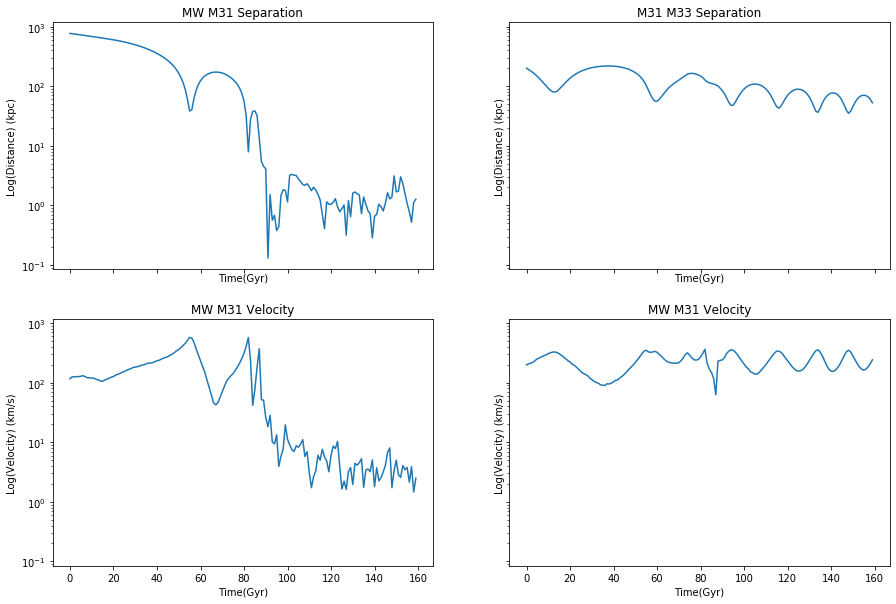

In [40]:
fig,ax = plt.subplots(nrows = 2, ncols = 2, sharex = 'all', sharey = 'all', figsize = (15,10))
#Plot the positional separation between MW and M31
ax[0,0].set_title('MW M31 Separation')
ax[0,0].set_ylabel('Log(Distance) (kpc)')
ax[0,0].set_xlabel('Time(Gyr)')
ax[0,0].plot(MW_M31_Pos)
ax[0,0].set(yscale='log')
#Plot the velocity of MW and M31
ax[1,0].plot(MW_M31_Vel)
ax[1,0].set(yscale='log')
ax[1,0].set_title('MW M31 Velocity')
ax[1,0].set_ylabel('Log(Velocity) (km/s)')
ax[1,0].set_xlabel('Time(Gyr)')
#Plot the positional separtation between M31 and M31
ax[0,1].plot(M31_M33_Pos)
ax[0,1].set_title('M31 M33 Separation')
ax[0,1].set_ylabel('Log(Distance) (kpc)')
ax[0,1].set(yscale='log')
ax[0,1].set_xlabel('Time(Gyr)')
#Plot the velocity between M31 and M33
ax[1,1].plot(M31_M33_Vel)
ax[1,1].set_title('MW M31 Velocity')
ax[1,1].set(yscale='log')
ax[1,1].set_ylabel('Log(Velocity) (km/s)')
ax[1,1].set_xlabel('Time(Gyr)')

#1 The Milky Way and M31 will undergo roughly nine close calls. These were found by counting the number of times that the position plot changes direction.
#2 The points at which the position vector is at a minimum, the velocity vector will be at a maximum. This represents the phenomenon of the galaxies slowing as they move farther away from each other.
#3 The two galaxies appear to fully mearge around 60-80Gyr. At this point the orbit of M33 begins to decay, as it falls into M31.